In [1]:
from config import API_KEY
import pandas as pd,plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "svg"
import sweetviz as sv
import plotly.express as px


Obtaining Data

In [2]:
# Data Collection
from tiingo import TiingoClient
from datetime import datetime, timedelta

config = {
    'api_key': API_KEY,
    'session': True  # Use requests.Session
}
client = TiingoClient(config)

# Calculate the start date as today's date minus 2 years
end_date = datetime.now()
start_date = end_date - timedelta(days=20*365)

# Convert dates to string format
start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')

df = client.get_dataframe('MSFT', frequency='daily',startDate=start_date_str, endDate=end_date_str)

df.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2004-03-01 00:00:00+00:00,26.70,26.72,26.50,26.65,51912300,16.702215,16.714726,16.577105,16.670938,51912300,0.0,1.0
2004-03-02 00:00:00+00:00,26.39,26.69,26.35,26.63,66331000,16.508294,16.695960,16.483272,16.658427,66331000,0.0,1.0
2004-03-03 00:00:00+00:00,26.37,26.55,26.22,26.35,54998700,16.495783,16.608383,16.401951,16.483272,54998700,0.0,1.0
2004-03-04 00:00:00+00:00,26.37,26.42,26.21,26.37,44023200,16.495783,16.527061,16.395695,16.495783,44023200,0.0,1.0
2004-03-05 00:00:00+00:00,26.35,26.60,26.20,26.23,59849800,16.483272,16.639660,16.389440,16.408206,59849800,0.0,1.0


In [3]:
df.reset_index(inplace=True)
df.rename(columns={'index': 'new_index'}, inplace=True)  # Rename the old index column
df['date'] = df['date'].dt.date  # Extract the date part from the datetime index
df

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2004-03-01,26.70,26.72,26.50,26.65,51912300,16.702215,16.714726,16.577105,16.670938,51912300,0.0,1.0
1,2004-03-02,26.39,26.69,26.35,26.63,66331000,16.508294,16.695960,16.483272,16.658427,66331000,0.0,1.0
2,2004-03-03,26.37,26.55,26.22,26.35,54998700,16.495783,16.608383,16.401951,16.483272,54998700,0.0,1.0
3,2004-03-04,26.37,26.42,26.21,26.37,44023200,16.495783,16.527061,16.395695,16.495783,44023200,0.0,1.0
4,2004-03-05,26.35,26.60,26.20,26.23,59849800,16.483272,16.639660,16.389440,16.408206,59849800,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,2024-02-16,404.06,408.29,403.44,407.96,22296495,404.060000,408.290000,403.440000,407.960000,22296495,0.0,1.0
5027,2024-02-20,402.79,404.49,398.01,403.24,24307915,402.790000,404.490000,398.010000,403.240000,24307915,0.0,1.0
5028,2024-02-21,402.18,402.29,397.22,400.17,18631072,402.180000,402.290000,397.220000,400.170000,18631072,0.0,1.0
5029,2024-02-22,411.65,412.83,408.57,410.19,27009869,411.650000,412.830000,408.570000,410.190000,27009869,0.0,1.0


Exploratory Analysis

Removing Columns

In [4]:
# Removing 'Dividends' and 'Stock Splits' columns
df = df.drop(['divCash', 'splitFactor','close','high','low'], axis = 1)
# See results
df

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume
0,2004-03-01,26.65,51912300,16.702215,16.714726,16.577105,16.670938,51912300
1,2004-03-02,26.63,66331000,16.508294,16.695960,16.483272,16.658427,66331000
2,2004-03-03,26.35,54998700,16.495783,16.608383,16.401951,16.483272,54998700
3,2004-03-04,26.37,44023200,16.495783,16.527061,16.395695,16.495783,44023200
4,2004-03-05,26.23,59849800,16.483272,16.639660,16.389440,16.408206,59849800
...,...,...,...,...,...,...,...,...
5026,2024-02-16,407.96,22296495,404.060000,408.290000,403.440000,407.960000,22296495
5027,2024-02-20,403.24,24307915,402.790000,404.490000,398.010000,403.240000,24307915
5028,2024-02-21,400.17,18631072,402.180000,402.290000,397.220000,400.170000,18631072
5029,2024-02-22,410.19,27009869,411.650000,412.830000,408.570000,410.190000,27009869


In [5]:
# # # Creating a new dataframe containing the last 2 years data to later test how well our predicting model will compare to the closing prices
# df_predict = df.tail(506)
# # See results
# df_predict

In [6]:
# # # Removing last 2 years from the original dataframe
# df.drop(df_predict.index,inplace = True)
# # See results
# df

In [7]:
# Removing NaN
df.dropna(inplace=True)
# See Results
df

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume
0,2004-03-01,26.65,51912300,16.702215,16.714726,16.577105,16.670938,51912300
1,2004-03-02,26.63,66331000,16.508294,16.695960,16.483272,16.658427,66331000
2,2004-03-03,26.35,54998700,16.495783,16.608383,16.401951,16.483272,54998700
3,2004-03-04,26.37,44023200,16.495783,16.527061,16.395695,16.495783,44023200
4,2004-03-05,26.23,59849800,16.483272,16.639660,16.389440,16.408206,59849800
...,...,...,...,...,...,...,...,...
5026,2024-02-16,407.96,22296495,404.060000,408.290000,403.440000,407.960000,22296495
5027,2024-02-20,403.24,24307915,402.790000,404.490000,398.010000,403.240000,24307915
5028,2024-02-21,400.17,18631072,402.180000,402.290000,397.220000,400.170000,18631072
5029,2024-02-22,410.19,27009869,411.650000,412.830000,408.570000,410.190000,27009869


<AxesSubplot: >

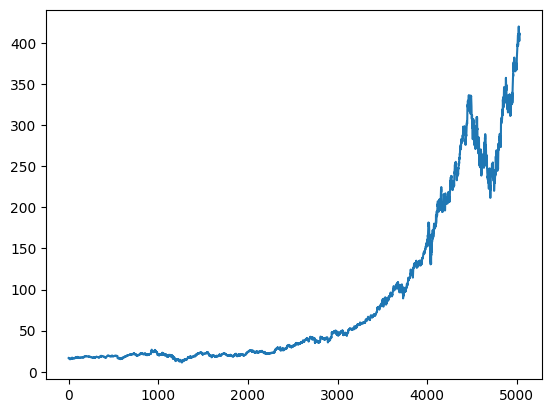

In [8]:
df.adjClose.plot()

In [9]:
diffs= df.diff()

<AxesSubplot: >

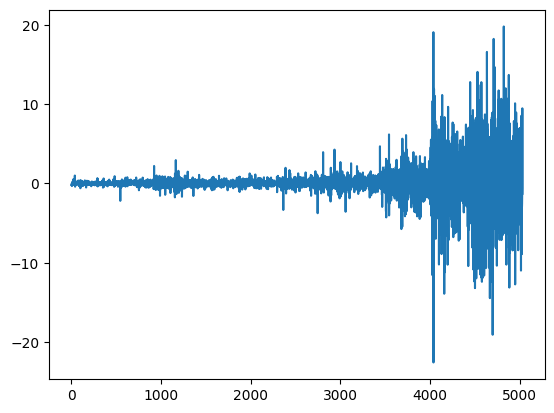

In [10]:
diffs.adjClose.plot()

In [11]:
diffs.corr()

,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume
open,1.000000,-0.007674,0.280839,0.694596,0.707307,0.998957,-0.007674
volume,-0.007674,1.000000,-0.023069,0.051957,-0.080206,-0.008904,1.000000
adjClose,0.280839,-0.023069,1.000000,0.688244,0.695593,0.280427,-0.023069
adjHigh,0.694596,0.051957,0.688244,1.000000,0.720939,0.694702,0.051957
adjLow,0.707307,-0.080206,0.695593,0.720939,1.000000,0.707600,-0.080206
adjOpen,0.998957,-0.008904,0.280427,0.694702,0.707600,1.000000,-0.008904
adjVolume,-0.007674,1.000000,-0.023069,0.051957,-0.080206,-0.008904,1.000000


In [12]:
# Assuming your data is sorted by time
# Create a lag feature to represent the previous values
for i in range(1, 6):  # Assuming you want to use the first 15 points to predict the next one
    diffs[f'lag_{i}'] = diffs['adjClose'].shift(i)


In [13]:
diffs.head(10)

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,lag_1,lag_2,lag_3,lag_4,lag_5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"1 day, 0:00:00",-0.02,14418700.0,-0.193921,-0.018767,-0.093833,-0.012511,14418700.0,NaN,NaN,NaN,NaN,NaN
2,"1 day, 0:00:00",-0.28,-11332300.0,-0.012511,-0.087577,-0.081322,-0.175154,-11332300.0,-0.193921,NaN,NaN,NaN,NaN
3,"1 day, 0:00:00",0.02,-10975500.0,0.000000,-0.081322,-0.006256,0.012511,-10975500.0,-0.012511,-0.193921,NaN,NaN,NaN
4,"1 day, 0:00:00",-0.14,15826600.0,-0.012511,0.112599,-0.006256,-0.087577,15826600.0,0.000000,-0.012511,-0.193921,NaN,NaN
5,"3 days, 0:00:00",0.08,9518000.0,-0.325287,-0.156388,-0.243965,0.050044,9518000.0,-0.012511,0.000000,-0.012511,-0.193921,NaN
6,"1 day, 0:00:00",-0.54,11743900.0,-0.068811,-0.237709,-0.168899,-0.337798,11743900.0,-0.325287,-0.012511,0.000000,-0.012511,-0.193921
7,"1 day, 0:00:00",-0.11,-5955900.0,-0.218943,-0.106344,-0.118855,-0.068811,-5955900.0,-0.068811,-0.325287,-0.012511,0.000000,-0.012511
8,"1 day, 0:00:00",-0.46,15380500.0,-0.175154,-0.012511,-0.175154,-0.287754,15380500.0,-0.218943,-0.068811,-0.325287,-0.012511,0.000000
9,"1 day, 0:00:00",0.18,-26399200.0,0.181410,-0.168899,0.100088,0.112599,-26399200.0,-0.175154,-0.218943,-0.068811,-0.325287,-0.012511


In [14]:
diffs['date'] = df['date']
diffs

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,lag_1,lag_2,lag_3,lag_4,lag_5
0,2004-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-03-02,-0.02,14418700.0,-0.193921,-0.018767,-0.093833,-0.012511,14418700.0,NaN,NaN,NaN,NaN,NaN
2,2004-03-03,-0.28,-11332300.0,-0.012511,-0.087577,-0.081322,-0.175154,-11332300.0,-0.193921,NaN,NaN,NaN,NaN
3,2004-03-04,0.02,-10975500.0,0.000000,-0.081322,-0.006256,0.012511,-10975500.0,-0.012511,-0.193921,NaN,NaN,NaN
4,2004-03-05,-0.14,15826600.0,-0.012511,0.112599,-0.006256,-0.087577,15826600.0,0.000000,-0.012511,-0.193921,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,2024-02-16,-0.18,470970.0,-2.500000,-0.840000,-0.850000,-0.180000,470970.0,-2.930000,3.912833,-8.923656,-5.280329,6.428226
5027,2024-02-20,-4.72,2011420.0,-1.270000,-3.800000,-5.430000,-4.720000,2011420.0,-2.500000,-2.930000,3.912833,-8.923656,-5.280329
5028,2024-02-21,-3.07,-5676843.0,-0.610000,-2.200000,-0.790000,-3.070000,-5676843.0,-1.270000,-2.500000,-2.930000,3.912833,-8.923656
5029,2024-02-22,10.02,8378797.0,9.470000,10.540000,11.350000,10.020000,8378797.0,-0.610000,-1.270000,-2.500000,-2.930000,3.912833


In [15]:
diffs = diffs.drop(0)
diffs

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,lag_1,lag_2,lag_3,lag_4,lag_5
1,2004-03-02,-0.02,14418700.0,-0.193921,-0.018767,-0.093833,-0.012511,14418700.0,NaN,NaN,NaN,NaN,NaN
2,2004-03-03,-0.28,-11332300.0,-0.012511,-0.087577,-0.081322,-0.175154,-11332300.0,-0.193921,NaN,NaN,NaN,NaN
3,2004-03-04,0.02,-10975500.0,0.000000,-0.081322,-0.006256,0.012511,-10975500.0,-0.012511,-0.193921,NaN,NaN,NaN
4,2004-03-05,-0.14,15826600.0,-0.012511,0.112599,-0.006256,-0.087577,15826600.0,0.000000,-0.012511,-0.193921,NaN,NaN
5,2004-03-08,0.08,9518000.0,-0.325287,-0.156388,-0.243965,0.050044,9518000.0,-0.012511,0.000000,-0.012511,-0.193921,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,2024-02-16,-0.18,470970.0,-2.500000,-0.840000,-0.850000,-0.180000,470970.0,-2.930000,3.912833,-8.923656,-5.280329,6.428226
5027,2024-02-20,-4.72,2011420.0,-1.270000,-3.800000,-5.430000,-4.720000,2011420.0,-2.500000,-2.930000,3.912833,-8.923656,-5.280329
5028,2024-02-21,-3.07,-5676843.0,-0.610000,-2.200000,-0.790000,-3.070000,-5676843.0,-1.270000,-2.500000,-2.930000,3.912833,-8.923656
5029,2024-02-22,10.02,8378797.0,9.470000,10.540000,11.350000,10.020000,8378797.0,-0.610000,-1.270000,-2.500000,-2.930000,3.912833


In [16]:
diffs.dropna()

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,lag_1,lag_2,lag_3,lag_4,lag_5
6,2004-03-09,-0.54,11743900.0,-0.068811,-0.237709,-0.168899,-0.337798,11743900.0,-0.325287,-0.012511,0.000000,-0.012511,-0.193921
7,2004-03-10,-0.11,-5955900.0,-0.218943,-0.106344,-0.118855,-0.068811,-5955900.0,-0.068811,-0.325287,-0.012511,0.000000,-0.012511
8,2004-03-11,-0.46,15380500.0,-0.175154,-0.012511,-0.175154,-0.287754,15380500.0,-0.218943,-0.068811,-0.325287,-0.012511,0.000000
9,2004-03-12,0.18,-26399200.0,0.181410,-0.168899,0.100088,0.112599,-26399200.0,-0.175154,-0.218943,-0.068811,-0.325287,-0.012511
10,2004-03-15,-0.05,4698200.0,-0.137621,-0.050044,-0.106344,-0.031278,4698200.0,0.181410,-0.175154,-0.218943,-0.068811,-0.325287
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,2024-02-16,-0.18,470970.0,-2.500000,-0.840000,-0.850000,-0.180000,470970.0,-2.930000,3.912833,-8.923656,-5.280329,6.428226
5027,2024-02-20,-4.72,2011420.0,-1.270000,-3.800000,-5.430000,-4.720000,2011420.0,-2.500000,-2.930000,3.912833,-8.923656,-5.280329
5028,2024-02-21,-3.07,-5676843.0,-0.610000,-2.200000,-0.790000,-3.070000,-5676843.0,-1.270000,-2.500000,-2.930000,3.912833,-8.923656
5029,2024-02-22,10.02,8378797.0,9.470000,10.540000,11.350000,10.020000,8378797.0,-0.610000,-1.270000,-2.500000,-2.930000,3.912833


In [17]:
import numpy as np
diffs['target'] =np.where(diffs.adjClose >=0 ,1,0 )
diffs.head()

,date,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,lag_1,lag_2,lag_3,lag_4,lag_5,target
1,2004-03-02,-0.02,14418700.0,-0.193921,-0.018767,-0.093833,-0.012511,14418700.0,NaN,NaN,NaN,NaN,NaN,0
2,2004-03-03,-0.28,-11332300.0,-0.012511,-0.087577,-0.081322,-0.175154,-11332300.0,-0.193921,NaN,NaN,NaN,NaN,0
3,2004-03-04,0.02,-10975500.0,0.000000,-0.081322,-0.006256,0.012511,-10975500.0,-0.012511,-0.193921,NaN,NaN,NaN,1
4,2004-03-05,-0.14,15826600.0,-0.012511,0.112599,-0.006256,-0.087577,15826600.0,0.000000,-0.012511,-0.193921,NaN,NaN,0
5,2004-03-08,0.08,9518000.0,-0.325287,-0.156388,-0.243965,0.050044,9518000.0,-0.012511,0.000000,-0.012511,-0.193921,NaN,0


In [18]:
diffs.columns

Index(['date', 'open', 'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen',
       'adjVolume', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'target'],
      dtype='object')

In [19]:
adjClose_df = diffs['adjClose']

In [20]:
diffs.drop(['date', 'open', 'volume', 'adjClose', 'adjHigh', 'adjLow','adjVolume'],axis=1,inplace=True)
diffs.head()


,adjOpen,lag_1,lag_2,lag_3,lag_4,lag_5,target
1,-0.012511,NaN,NaN,NaN,NaN,NaN,0
2,-0.175154,-0.193921,NaN,NaN,NaN,NaN,0
3,0.012511,-0.012511,-0.193921,NaN,NaN,NaN,1
4,-0.087577,0.000000,-0.012511,-0.193921,NaN,NaN,0
5,0.050044,-0.012511,0.000000,-0.012511,-0.193921,NaN,0


In [21]:
diffs.dropna(inplace=True)

In [22]:
diffs.head()

,adjOpen,lag_1,lag_2,lag_3,lag_4,lag_5,target
6,-0.337798,-0.325287,-0.012511,0.000000,-0.012511,-0.193921,0
7,-0.068811,-0.068811,-0.325287,-0.012511,0.000000,-0.012511,0
8,-0.287754,-0.218943,-0.068811,-0.325287,-0.012511,0.000000,0
9,0.112599,-0.175154,-0.218943,-0.068811,-0.325287,-0.012511,1
10,-0.031278,0.181410,-0.175154,-0.218943,-0.068811,-0.325287,0


In [23]:
# # Creating a new dataframe containing the last 2 years data to later test how well our predicting model will compare to the closing prices
df_predict = diffs.tail(506)
# See results
df_predict



,adjOpen,lag_1,lag_2,lag_3,lag_4,lag_5,target
4525,-1.969166,-0.343035,5.361140,-0.039204,-7.193925,-8.654272,0
4526,-3.250842,-8.613259,-0.343035,5.361140,-0.039204,-7.193925,0
4527,-7.906127,-2.749957,-8.613259,-0.343035,5.361140,-0.039204,0
4528,5.087421,-0.206247,-2.749957,-8.613259,-0.343035,5.361140,0
4529,-17.354195,-7.316851,-0.206247,-2.749957,-8.613259,-0.343035,1
...,...,...,...,...,...,...,...
5026,-0.180000,-2.930000,3.912833,-8.923656,-5.280329,6.428226,0
5027,-4.720000,-2.500000,-2.930000,3.912833,-8.923656,-5.280329,0
5028,-3.070000,-1.270000,-2.500000,-2.930000,3.912833,-8.923656,0
5029,10.020000,-0.610000,-1.270000,-2.500000,-2.930000,3.912833,1


In [24]:
# # Removing last 2 years from the original dataframe
diffs.drop(df_predict.index,inplace = True)
# See results
diffs

,adjOpen,lag_1,lag_2,lag_3,lag_4,lag_5,target
6,-0.337798,-0.325287,-0.012511,0.000000,-0.012511,-0.193921,0
7,-0.068811,-0.068811,-0.325287,-0.012511,0.000000,-0.012511,0
8,-0.287754,-0.218943,-0.068811,-0.325287,-0.012511,0.000000,0
9,0.112599,-0.175154,-0.218943,-0.068811,-0.325287,-0.012511,1
10,-0.031278,0.181410,-0.175154,-0.218943,-0.068811,-0.325287,0
...,...,...,...,...,...,...,...
4520,-5.709075,6.517656,3.538156,-4.890693,4.596663,-11.967005,0
4521,-0.833084,-8.654272,6.517656,3.538156,-4.890693,4.596663,0
4522,-9.232530,-7.193925,-8.654272,6.517656,3.538156,-4.890693,0
4523,6.113856,-0.039204,-7.193925,-8.654272,6.517656,3.538156,1


In [25]:
diffs.iloc[:,:-1]

,adjOpen,lag_1,lag_2,lag_3,lag_4,lag_5
6,-0.337798,-0.325287,-0.012511,0.000000,-0.012511,-0.193921
7,-0.068811,-0.068811,-0.325287,-0.012511,0.000000,-0.012511
8,-0.287754,-0.218943,-0.068811,-0.325287,-0.012511,0.000000
9,0.112599,-0.175154,-0.218943,-0.068811,-0.325287,-0.012511
10,-0.031278,0.181410,-0.175154,-0.218943,-0.068811,-0.325287
...,...,...,...,...,...,...
4520,-5.709075,6.517656,3.538156,-4.890693,4.596663,-11.967005
4521,-0.833084,-8.654272,6.517656,3.538156,-4.890693,4.596663
4522,-9.232530,-7.193925,-8.654272,6.517656,3.538156,-4.890693
4523,6.113856,-0.039204,-7.193925,-8.654272,6.517656,3.538156


In [27]:
from pycaret.classification import *
s = setup(diffs, target='target', session_id=123)



,Description,Value
0,Session id,123
1,Target,target
2,Target type,classification
3,Data shape,"(4519, 7)"
4,Train data shape,"(3163, 7)"
5,Test data shape,"(1356, 7)"
6,Numeric features,6
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [28]:
#  Obtaining top 3 best models
top5 = compare_models(n_select=5)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6042,0.6402,0.6517,0.6181,0.6343,0.2036,0.2041,0.0700
catboost,CatBoost Classifier,0.5956,0.6270,0.6444,0.6104,0.6265,0.1862,0.1870,1.0240
ada,Ada Boost Classifier,0.5922,0.6205,0.6715,0.6020,0.6341,0.1764,0.1784,0.0290
lr,Logistic Regression,0.5833,0.6594,0.8633,0.5694,0.6860,0.1384,0.1677,0.3540
rf,Random Forest Classifier,0.5741,0.6102,0.6120,0.5929,0.6018,0.1441,0.1445,0.0810
et,Extra Trees Classifier,0.5741,0.6105,0.6139,0.5929,0.6027,0.1439,0.1443,0.0570
lightgbm,Light Gradient Boosting Machine,0.5738,0.6020,0.6024,0.5942,0.5977,0.1444,0.1448,0.2920
ridge,Ridge Classifier,0.5653,0.0000,0.8981,0.5542,0.6854,0.0955,0.1311,0.0050
lda,Linear Discriminant Analysis,0.5650,0.6596,0.8975,0.5540,0.6851,0.0949,0.1302,0.0050
dt,Decision Tree Classifier,0.5577,0.5571,0.5677,0.5823,0.5744,0.1142,0.1144,0.0070


In [ ]:
# gbc= create_model('gbc', fold=10)

In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5931,0.6448,0.8623,0.5760,0.6906,0.1601,0.1903
1,0.5962,0.6576,0.8683,0.5777,0.6938,0.1663,0.1987
2,0.5868,0.6799,0.8862,0.5692,0.6932,0.1441,0.1814
3,0.5791,0.6473,0.8383,0.5691,0.6780,0.1306,0.1526
4,0.5633,0.6687,0.8563,0.5564,0.6745,0.0943,0.1168
5,0.6108,0.6915,0.9162,0.5840,0.7133,0.1912,0.2448
6,0.5791,0.6260,0.8323,0.5697,0.6764,0.1313,0.1519
7,0.5981,0.6632,0.8323,0.5840,0.6864,0.1723,0.1944
8,0.5728,0.7048,0.8675,0.5603,0.6809,0.1176,0.1463
9,0.5538,0.6103,0.8735,0.5472,0.6729,0.0759,0.0998


In [30]:
tune_lr = tune_model(lr, n_iter=2000)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6215,0.6455,0.6707,0.6328,0.6512,0.2381,0.2386
1,0.5994,0.6569,0.6108,0.6220,0.6163,0.1972,0.1973
2,0.6309,0.6772,0.6766,0.6420,0.6589,0.2574,0.2579
3,0.6203,0.6440,0.6287,0.6442,0.6364,0.2391,0.2392
4,0.6456,0.6675,0.6766,0.6608,0.6686,0.2878,0.2879
5,0.6392,0.6898,0.6946,0.6480,0.6705,0.2730,0.2738
6,0.5949,0.6273,0.5749,0.6275,0.6000,0.1913,0.1921
7,0.6297,0.6628,0.6108,0.6623,0.6355,0.2606,0.2614
8,0.6709,0.7045,0.6928,0.6845,0.6886,0.3397,0.3397
9,0.5759,0.6006,0.6024,0.5952,0.5988,0.1492,0.1492


In [31]:
final_lr_model = finalize_model(tune_lr)



In [32]:

df_predict

,adjOpen,lag_1,lag_2,lag_3,lag_4,lag_5,target
4525,-1.969166,-0.343035,5.361140,-0.039204,-7.193925,-8.654272,0
4526,-3.250842,-8.613259,-0.343035,5.361140,-0.039204,-7.193925,0
4527,-7.906127,-2.749957,-8.613259,-0.343035,5.361140,-0.039204,0
4528,5.087421,-0.206247,-2.749957,-8.613259,-0.343035,5.361140,0
4529,-17.354195,-7.316851,-0.206247,-2.749957,-8.613259,-0.343035,1
...,...,...,...,...,...,...,...
5026,-0.180000,-2.930000,3.912833,-8.923656,-5.280329,6.428226,0
5027,-4.720000,-2.500000,-2.930000,3.912833,-8.923656,-5.280329,0
5028,-3.070000,-1.270000,-2.500000,-2.930000,3.912833,-8.923656,0
5029,10.020000,-0.610000,-1.270000,-2.500000,-2.930000,3.912833,1


In [33]:
predictions = predict_model(final_lr_model,
                          data =df_predict)
predictions.head(50)

,adjOpen,lag_1,lag_2,lag_3,lag_4,lag_5,Label,Score
4525,-1.969166,-0.343035,5.361140,-0.039204,-7.193925,-8.654272,0,0.5791
4526,-3.250842,-8.613259,-0.343035,5.361140,-0.039204,-7.193925,1,0.8358
4527,-7.906127,-2.749957,-8.613259,-0.343035,5.361140,-0.039204,0,0.8972
4528,5.087421,-0.206247,-2.749957,-8.613259,-0.343035,5.361140,1,0.8454
4529,-17.354195,-7.316851,-0.206247,-2.749957,-8.613259,-0.343035,0,0.9821
4530,22.225548,14.064068,-7.316851,-0.206247,-2.749957,-8.613259,1,0.9809
4531,-0.815166,2.671387,14.064068,-7.316851,-0.206247,-2.749957,0,0.7341
4532,2.052647,1.453549,2.671387,14.064068,-7.316851,-0.206247,1,0.6386
4533,-1.021413,-3.771370,1.453549,2.671387,14.064068,-7.316851,1,0.6886
4534,7.395421,5.146349,-3.771370,1.453549,2.671387,14.064068,1,0.6932


In [34]:
adjClose_df

1      -0.193921
2      -0.012511
3       0.000000
4      -0.012511
5      -0.325287
          ...   
5026   -2.500000
5027   -1.270000
5028   -0.610000
5029    9.470000
5030   -1.310000
Name: adjClose, Length: 5030, dtype: float64

In [35]:
# Create a new column 'Profit_Loss' and calculate cumulative total
predictions['Profit_Loss'] = 0  # Initialize the column with zeros
cumulative_total = 0  # Initialize cumulative total

# Apply the logic to calculate profits and losses and update cumulative total
for index, row in predictions.iterrows():
    if row['Score'] > 0.7:
        predictions.at[index, 'Profit_Loss'] = row['adjOpen']
        cumulative_total += row['adjOpen']
    else:
        predictions.at[index, 'Profit_Loss'] = -row['adjOpen']
        cumulative_total -= row['adjOpen']
    predictions.at[index, 'Cumulative_Total'] = cumulative_total

# Display the updated DataFrame
predictions

,adjOpen,lag_1,lag_2,lag_3,lag_4,lag_5,Label,Score,Profit_Loss,Cumulative_Total
4525,-1.969166,-0.343035,5.361140,-0.039204,-7.193925,-8.654272,0,0.5791,1.969166,1.969166
4526,-3.250842,-8.613259,-0.343035,5.361140,-0.039204,-7.193925,1,0.8358,-3.250842,-1.281677
4527,-7.906127,-2.749957,-8.613259,-0.343035,5.361140,-0.039204,0,0.8972,-7.906127,-9.187804
4528,5.087421,-0.206247,-2.749957,-8.613259,-0.343035,5.361140,1,0.8454,5.087421,-4.100383
4529,-17.354195,-7.316851,-0.206247,-2.749957,-8.613259,-0.343035,0,0.9821,-17.354195,-21.454578
...,...,...,...,...,...,...,...,...,...,...
5026,-0.180000,-2.930000,3.912833,-8.923656,-5.280329,6.428226,1,0.6682,0.180000,108.474938
5027,-4.720000,-2.500000,-2.930000,3.912833,-8.923656,-5.280329,0,0.6750,4.720000,113.194938
5028,-3.070000,-1.270000,-2.500000,-2.930000,3.912833,-8.923656,0,0.6581,3.070000,116.264938
5029,10.020000,-0.610000,-1.270000,-2.500000,-2.930000,3.912833,1,0.9770,10.020000,126.284938


In [36]:
fig = px.line(predictions, x=df_predict.index, y=["adjOpen","Label"], template='plotly_dark')
# Add a vertical rectangle for test-set separation
# fig.add_vrect(x0="2023-01-01", x1="2024-31-01", fillcolor="grey", opacity=0.25, line_width=0)
# Show the plot
fig.show()